In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\durga\\OneDrive\\Desktop\\Data Analytics\\amazon_sales_data 2025.csv")

In [3]:
df.head(1)

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled


What are the top selling products?

<Axes: xlabel='Product'>

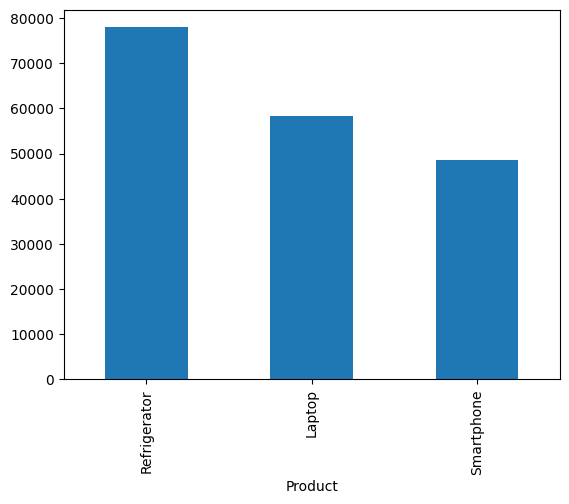

In [17]:
df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(3).plot(kind="bar")

What is the most profitable category

<Axes: ylabel='Total Sales'>

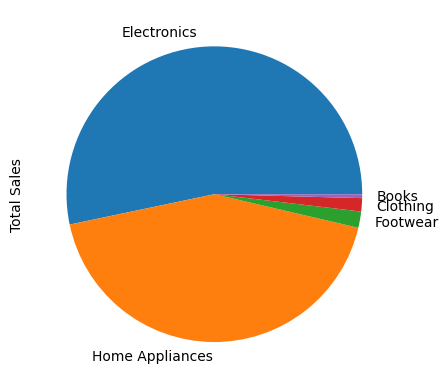

In [23]:
df.groupby("Category")["Total Sales"].sum().sort_values(ascending=False).plot(kind="pie")

Customer who bought the highest quantity

In [26]:
df.groupby("Customer Name")["Quantity"].count().sort_values(ascending=False).head(1)

Customer Name
Emma Clark    32
Name: Quantity, dtype: int64

What are the avg order values

In [29]:
df["Total Sales"].mean()

np.float64(975.38)

Which payment method is most used?

<Axes: ylabel='count'>

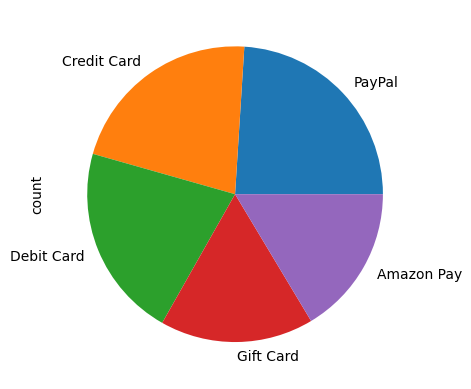

In [34]:
df["Payment Method"].value_counts().plot(kind="pie")

Status Analysis?

In [36]:
df["Status"].value_counts()

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

How much revenue lost due to order cancelled?

In [41]:
Cancelled = df.groupby(df["Status"]=="Cancelled")["Total Sales"].sum()
pending = df.groupby(df["Status"]=="Pending")["Total Sales"].sum()
Completed = df.groupby(df["Status"]=="Completed")["Total Sales"].sum()
print(Cancelled)
print(pending)
print(Completed)

Status
False    178815
True      65030
Name: Total Sales, dtype: int64
Status
False    153560
True      90285
Name: Total Sales, dtype: int64
Status
False    155315
True      88530
Name: Total Sales, dtype: int64


Date wise sales trend

Text(0.5, 1.0, 'Date wise sales trend')

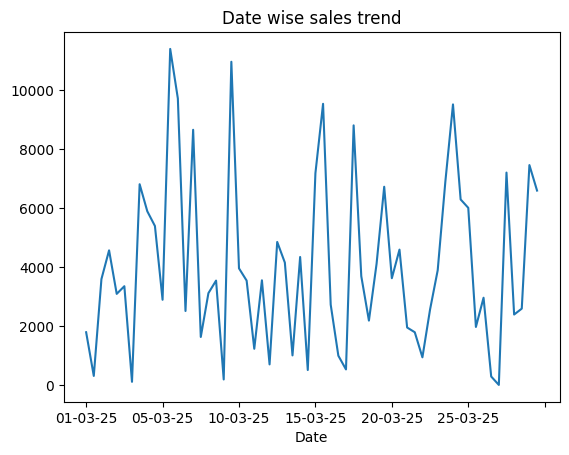

In [47]:
df.groupby("Date")["Total Sales"].sum().plot(kind="line")
plt.title("Date wise sales trend")

Peak sales date?


In [49]:
df.groupby("Date")["Total Sales"].sum().sort_values(ascending=False).head(1)

Date
06-02-25    11400
Name: Total Sales, dtype: int64

Which product cancelled most?


In [5]:
counts = df.groupby(df["Status"]=="Cancelled")["Product"].value_counts()
counts[True].head(5)

Product
Headphones      10
Jeans            9
Smartphone       9
Smartwatch       9
Refrigerator     8
Name: count, dtype: int64

highest spending customer

In [63]:
df.groupby("Customer Name")["Total Sales"].sum().sort_values(ascending=False).head(4)

Customer Name
Olivia Wilson    36170
Jane Smith       31185
Emma Clark       29700
John Doe         26870
Name: Total Sales, dtype: int64

Correlation between quanity vs sales?

In [11]:
df[['Quantity','Total Sales']].corr()

,Quantity,Total Sales
Quantity,1.000000,0.332444
Total Sales,0.332444,1.000000


Month wise sales?

In [18]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%y')